In [68]:

#Install what is needed
!pip install pandas numpy matplotlib xarray hvplot
!pip install rasterio
!pip install rioxarray
!pip install fiona 
!pip install geopandas
!pip install cartopy
!pip install geopandas hvplot geoviews




import fiona



from math import floor, ceil
import os
import pathlib
import geopandas as gpd
from shapely.geometry import box
import hvplot.xarray  # for plotting
import rioxarray  # required for .rio
import xarray as xr
import os
import pathlib
import requests
import zipfile
import geopandas as gpd 
import hvplot.pandas  # for interactive plotting
#Import from above
import rioxarray as rxr
from rioxarray.merge import merge_arrays

import matplotlib.pyplot as plt

import geopandas as gpd
import cartopy.crs as ccrsp

!pip install earthaccess

import earthaccess

from glob import glob


import pandas as pd
import numpy as np
import xarray as xr
import rioxarray as rxr
from rioxarray.merge import merge_arrays

import hvplot.pandas
import hvplot.xarray
 

In [2]:
# Define project directory in your home folder on CyVerse
project_data_dir = os.path.join(
    pathlib.Path.home(),
    'Colorado_Juniper_Study',
    'data'
)
os.makedirs(project_data_dir, exist_ok=True)

print("Data directory is:", project_data_dir)

colorado_url = (
    "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_20m.zip"
)
colorado_dir = os.path.join(project_data_dir, 'colorado_shapefile')
os.makedirs(colorado_dir, exist_ok=True)
colorado_zip_path = os.path.join(colorado_dir, 'cb_2022_us_state_20m.zip')
colorado_shp_path = os.path.join(colorado_dir, 'cb_2022_us_state_20m.shp')

import requests
import zipfile

if not os.path.exists(colorado_shp_path):
    # Download the zip file
    print("Downloading Colorado boundary shapefile...")
    r = requests.get(colorado_url)
    with open(colorado_zip_path, 'wb') as f:
        f.write(r.content)
    print("Download complete.")

    # Extract the zip contents
    with zipfile.ZipFile(colorado_zip_path, 'r') as zip_ref:
        zip_ref.extractall(colorado_dir)
    print("Extraction complete.")
else:
    print("Colorado shapefile already downloaded and extracted.")

    import geopandas as gpd

# Load the shapefile (this contains all US states)
states_gdf = gpd.read_file(colorado_shp_path)

# Filter for Colorado only (STATEFP = '08' is Colorado FIPS code)
colorado_gdf = states_gdf[states_gdf['STUSPS'] == 'CO']

print(colorado_gdf)

import hvplot.pandas  # for interactive plotting

!pip install geoviews

colorado_gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    title='Colorado State Boundary',
    fill_color=None,
    line_color='green',
    line_width=2,
    frame_width=600,
)

Data directory is: /home/jovyan/Colorado_Juniper_Study/data
Download complete.
Extraction complete.
   STATEFP   STATENS     AFFGEOID GEOID STUSPS      NAME LSAD         ALAND  \
32      08  01779779  0400000US08    08     CO  Colorado   00  268418736192   

        AWATER                                           geometry  
32  1185778676  POLYGON ((-109.05996 38.49999, -109.05996 38.5...  


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [4]:
# Set paths and expand ~
zip_path = os.path.expanduser("~/data-store/CAST_Species_Test/ROMO_BND_Boundary_ln_NAD83_1_-2492591587797863848.zip")
extract_path = os.path.expanduser("~/data-store/CAST_Species_Test/romo_boundary")

# Extract zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find the .shp file
for fname in os.listdir(extract_path):
    if fname.endswith('.shp'):
        shp_file = os.path.join(extract_path, fname)
        break

# Load shapefile with geopandas
romo_gdf = gpd.read_file(shp_file)

# Reproject to EPSG:4326 (WGS84) for web map compatibility
romo_gdf = romo_gdf.to_crs("EPSG:4326")

# Preview
romo_gdf.head()

,FID_ROMO_B,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,...,EDITDATE,EDITUSER,MAPMETHOD,MAPSOURCE,SOURCEDATE,XYACCURACY,GEOMETRYID,NOTES,GlobalID,geometry
0,0,ROMO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Rocky Mountain National Park,2018-03-27,CO,IM,204948,National Park,Lands,...,2018-04-12,AKONKOWSKI,Unknown,Unknown,1899-12-30,Unknown,{3A23FAEB-1A49-4AFF-AFF0-3092D45FF010},None,6e2eee05-113a-48be-9244-3382ae8e723e,"LINESTRING Z (-105.53362 40.29996 0, -105.5336..."
1,0,ROMO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Rocky Mountain National Park,2018-03-27,CO,IM,204948,National Park,Lands,...,2018-04-12,AKONKOWSKI,Unknown,Unknown,1899-12-30,Unknown,{3A23FAEB-1A49-4AFF-AFF0-3092D45FF010},None,ecc0e3be-7134-464c-99b2-8ce3b3c025b8,"LINESTRING Z (-105.51526 40.39589 0, -105.5152..."
2,0,ROMO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Rocky Mountain National Park,2018-03-27,CO,IM,204948,National Park,Lands,...,2018-04-12,AKONKOWSKI,Unknown,Unknown,1899-12-30,Unknown,{3A23FAEB-1A49-4AFF-AFF0-3092D45FF010},None,43831279-f530-4ea1-ae60-b8ee0e85956d,"LINESTRING Z (-105.53362 40.29996 0, -105.5339..."


In [5]:
romo_gdf.hvplot(
    geo=True,
    tiles='EsriImagery',
    line_color='green',
    line_width=2,
    title='Rocky Mountain National Park Boundary'
)

:Overlay
   .WMTS.I :WMTS   [Longitude,Latitude]
   .Path.I :Path   [Longitude,Latitude]

In [6]:
# Get bounding box of ROMO in EPSG:4326
minx, miny, maxx, maxy = romo_gdf.total_bounds
print(f"ROMO Bounding Box: {minx}, {miny}, {maxx}, {maxy}")


ROMO Bounding Box: -105.91371393211266, 40.15806679784828, -105.4935834660306, 40.55378731709419


In [8]:
# Paths
zip_path = os.path.expanduser ("~/data-store/CAST_Species_Test/0001007-250711103210423.zip")
extract_path = os.path.expanduser ("~/data-store/CAST_Species_Test/gbif_data")

# Extract zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find the CSV inside
for file in os.listdir(extract_path):
    if file.endswith(".csv"):
        gbif_csv_path = os.path.join(extract_path, file)
        break

# Load CSV
gbif_df = pd.read_csv(gbif_csv_path, sep='\t')
gbif_df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,912137522,cd6e21c8-9e8a-493a-8a76-fbf7862069e5,http://specimens.kew.org/herbarium/K000088556,Plantae,Tracheophyta,Pinopsida,Pinales,Cupressaceae,Juniperus,Juniperus scopulorum,...,"Farjon, A.",NaN,CC_BY_4_0,NaN,"Green, W.",NaN,NaN,2025-06-19T22:49:46.531Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,912137520,cd6e21c8-9e8a-493a-8a76-fbf7862069e5,http://specimens.kew.org/herbarium/K000088551,Plantae,Tracheophyta,Pinopsida,Pinales,Cupressaceae,Juniperus,Juniperus scopulorum,...,"Farjon, A.",NaN,CC_BY_4_0,NaN,"Jack, J.G.",NaN,NaN,2025-06-19T22:49:48.597Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,912137519,cd6e21c8-9e8a-493a-8a76-fbf7862069e5,http://specimens.kew.org/herbarium/K000088554,Plantae,Tracheophyta,Pinopsida,Pinales,Cupressaceae,Juniperus,Juniperus scopulorum,...,"Farjon, A.",NaN,CC_BY_4_0,NaN,"Rehder, A.",NaN,NaN,2025-06-19T22:49:46.776Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,912137518,cd6e21c8-9e8a-493a-8a76-fbf7862069e5,http://specimens.kew.org/herbarium/K000088543,Plantae,Tracheophyta,Pinopsida,Pinales,Cupressaceae,Juniperus,Juniperus scopulorum,...,"Farjon, A.",NaN,CC_BY_4_0,NaN,"Kirkwood, J.E.",NaN,NaN,2025-06-19T22:48:56.196Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,912137517,cd6e21c8-9e8a-493a-8a76-fbf7862069e5,http://specimens.kew.org/herbarium/K000088557,Plantae,Tracheophyta,Pinopsida,Pinales,Cupressaceae,Juniperus,Juniperus scopulorum,...,"Farjon, A.",NaN,CC_BY_4_0,NaN,"Lehto, E.",NaN,NaN,2025-06-19T22:49:46.499Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


In [11]:
!pip install pygbif
from pygbif import occurrences

# Search Juniperus scopulorum within bounding box (ROMO)
records = occurrences.search(
    scientificName="Juniperus scopulorum",
    hasCoordinate=True,
    limit=1000,
    decimalLatitude="40.1,40.6",
    decimalLongitude="-105.9,-105.4"
)

# Preview first few
for rec in records['results'][:5]:
    print(rec['species'], rec['decimalLatitude'], rec['decimalLongitude'])

Juniperus scopulorum 40.377706 -105.542436
Juniperus scopulorum 40.436258 -105.551189
Juniperus scopulorum 40.473475 -105.444317
Juniperus scopulorum 40.472766 -105.443738
Juniperus scopulorum 40.374133 -105.571019


In [12]:
# Convert GBIF records (list of dicts) to DataFrame
gbif_df = pd.DataFrame.from_records(records['results'])

# Drop rows without lat/lon
gbif_df = gbif_df.dropna(subset=["decimalLatitude", "decimalLongitude"])

# Quick preview
gbif_df[['species', 'decimalLatitude', 'decimalLongitude']].head()

,species,decimalLatitude,decimalLongitude
0,Juniperus scopulorum,40.377706,-105.542436
1,Juniperus scopulorum,40.436258,-105.551189
2,Juniperus scopulorum,40.473475,-105.444317
3,Juniperus scopulorum,40.472766,-105.443738
4,Juniperus scopulorum,40.374133,-105.571019


In [15]:
from shapely.geometry import Point

# Create geometry column
geometry = [Point(xy) for xy in zip(gbif_df["decimalLongitude"], gbif_df["decimalLatitude"])]
gbif_gdf = gpd.GeoDataFrame(gbif_df, geometry=geometry, crs="EPSG:4326")

# Ensure both are in EPSG:4326 for web maps
romo_gdf = romo_gdf.to_crs("EPSG:4326")
gbif_gdf = gbif_gdf.to_crs("EPSG:4326")


In [26]:
# ROMO boundary plot (with basemap set here)
romo_plot = romo_gdf.hvplot(
    geo=True,
    line_color='white',
    line_width=4,
    alpha=0.7,
    tiles='EsriImagery',  
    frame_width=800,
    frame_height=600,
    title="Juniperus scopulorum in Rocky Mountain National Park"
)

# GBIF points 
gbif_plot = gbif_gdf.hvplot.points(
    geo=True,
    color='pink',
    size=10,
    alpha=0.6
)

# Combine
romo_plot * gbif_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [39]:
# Process POLARIS Raster Image Part 1 of 2

# Create function with description to process raster images
def process_image(url, soil_prop, soil_stat, soil_depth, bounds_gdf):
    """
    Load, crop, and scale raster images for multiple sites.

    Parameters
    ----------
    url: str
      URL or path for raster files.
    soil_prop: str
      Soil property (e.g., "sand", "clay", etc.)
    soil_stat: str
      Soil statistic (e.g., "mean", "median", etc.)
    soil_depth: str
      Soil depth (e.g., "30-60cm", "60-100cm", etc.)
    bounds_gdf: gpd.GeoDataFrame
      Area of interest to crop to.
    site_names: list
      List of site names to be used as dictionary keys.
    Returns
    -------
   merged_da: rxr.DataArray
      Processed rasters 
    """

    # Iterate through the list of bounding GeoDataFrames (areas of interest)
    #for site_name, bounds_gdf in zip(site_names, bounds_gdfs):

    # Get the study bounds
    bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
    bounds_gdf
    .to_crs(4326)
    .total_bounds 
    )

    # List to store cropped DataArrays for the current site
    da_list = []
    
    # Loop through bounding box coordinates
    for min_lon in range(floor(bounds_min_lon), ceil(bounds_max_lon)):
      for min_lat in range(floor(bounds_min_lat), ceil(bounds_max_lat)):

        # Format the URL with the current coordinates and other parameters
        formated_url = (
          url.format( 
              soil_prop = soil_prop, 
              soil_stat = soil_stat, 
              soil_depth = soil_depth,
              min_lat=min_lat , max_lat=min_lat+1,
              min_lon=min_lon, max_lon=min_lon+1 )
        )

        # Connect to the raster image
        da = rxr.open_rasterio(
        formated_url, 
        mask_and_scale=True
        ).squeeze()
        
        # Crop the raster image to the bounds of the study area
        cropped_da = (
        da.rio.clip_box(bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat)
        )

        # Append the cropped DataArray to the list
        da_list.append(cropped_da)   

    # Merge the cropped DataArrays for this site
    merged_da = merge_arrays(da_list)

    return merged_da

In [40]:
# Process POLARIS raster image part 2 of 2
# Test the function by defining variables and plotting

# Set the site parameters
# soil variables
soil_prop = 'ph'
soil_stat = 'mean'
soil_depth = '60_100'
# set up url template
soil_url_template = (
            "http://hydrology.cee.duke.edu"
            "/POLARIS/PROPERTIES/v1.0"
            "/{soil_prop}"
            "/{soil_stat}"
            "/{soil_depth}"
            "/lat{min_lat}{max_lat}_lon{min_lon}{max_lon}.tif"
            )

# bounds
juniper_bounds_gdfs = [romo_gdf]

# output_directory - create data dir for polaris data 
polaris_dir= os.path.join(habitat_suitability_data_dir, 'polaris')
os.makedirs(polaris_dir, exist_ok=True)

In [43]:
# Create new variables for each study area using the process_image function

#Comanche National Grassland
polaris_juniper_processed = (process_image(
    soil_url_template,
    soil_prop, soil_stat, soil_depth,
    gbif_gdf
))



# Create a list to save both previous polaris processed study areas
polaris_processed_da_list = [
polaris_juniper_processed]

# Call the list to make sure it worked/looks right
polaris_processed_da_list

[<xarray.DataArray (y: 1529, x: 1727)> Size: 11MB
 array([[5.3249297, 5.5567565, 5.5567565, ..., 5.9841146, 7.0153956,
         6.124716 ],
        [5.8381715, 5.8381715, 5.6857896, ..., 6.124716 , 6.124716 ,
         5.9841146],
        [5.9841146, 5.9841146, 5.372667 , ..., 6.124716 , 5.9841146,
         6.124716 ],
        ...,
        [6.362094 , 6.8263984, 7.289723 , ..., 6.0116057, 6.0878925,
         6.0878925],
        [6.154023 , 6.154023 , 7.05097  , ..., 6.0885916, 6.088332 ,
         6.088332 ],
        [6.154023 , 6.154023 , 7.417261 , ..., 6.124716 , 6.124716 ,
         6.0767436]], dtype=float32)
 Coordinates:
   * x            (x) float64 14kB -105.9 -105.9 -105.9 ... -105.4 -105.4 -105.4
   * y            (y) float64 12kB 40.57 40.57 40.57 40.57 ... 40.15 40.15 40.15
     band         int64 8B 1
     spatial_ref  int64 8B 0
 Attributes:
     AREA_OR_POINT:  Area
     _FillValue:     nan]

In [44]:
# Prep for downloading SRTM 

# Define and create the project data directory
habitat_suitability_data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat_suitability'
)
os.makedirs(habitat_suitability_data_dir, exist_ok=True)

# Call the data directory to check its location
habitat_suitability_data_dir

# Create data dir 
elevation_dir= os.path.join(habitat_suitability_data_dir, 'srtm')
os.makedirs(elevation_dir, exist_ok=True)

# call the variable to check location
elevation_dir


'/home/jovyan/earth-analytics/data/habitat_suitability/srtm'

In [45]:
# Download Raster data through earthaccess Part 1 of 1
# Login and search earthaccess, download results

# login to earthaccess
earthaccess.login(strategy="interactive", persist=True)

# Iterate through the list of bounding GeoDataFrames (areas of interest)
for bounds_gdf in juniper_bounds_gdfs:

    # Only download once - conditional
    #if not glob (os.path.join(elevation_dir, '*hgt.zip')):
    # *when I used this my code wouldn't work*
   
    # Set bounds
    bounds = tuple(bounds_gdf.total_bounds)

    # Search earthaccess
    elevation_results = earthaccess.search_data(
        short_name = "SRTMGL1",
        bounding_box = bounds
    )
    elevation_results

    # Download earthaccess results
    srtm_files = earthaccess.download(elevation_results, elevation_dir)

    # Return a list of file paths that match the pattern
    srtm_files = glob (os.path.join(
    elevation_dir, 
    '*hgt.zip')
    )

# Call srtm_file to see it 
srtm_files


INFO:Granules found: 1
INFO: Getting 1 granules, approx download size: 0.01 GB


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

['/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W106.SRTMGL1.hgt.zip']

In [47]:
print("Number of files:", len(srtm_files))
print("Files:", srtm_files)

Number of files: 1
Files: ['/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W106.SRTMGL1.hgt.zip']


In [48]:
# Create list of files for each study area
juniper_srtm_files = [
    srtm_files[0] 
    ]


# Create list of each sites files # Call list to make sure it's right
srtm_files_list = [juniper_srtm_files]

# Call list to make sure it's right
srtm_files_list

[['/home/jovyan/earth-analytics/data/habitat_suitability/srtm/N40W106.SRTMGL1.hgt.zip']]

In [49]:
# Create function with description to process srtm raster images
# Part 1 of 1
def process_image_list(url_list, chosen_buffer, bounds_gdf):
    """
    Load, crop, and scale a raster image 

    Parameters
    ----------
    url: file-like or path-like
      File accessor downloaded or obtained 
    chosen_buffer: float number
      Amount of degrees to extend past the bounds of the bounds_gdf 
    bounds_gdf: gpd.GeoDataFrame
      Area of interest to crop to

    Returns
    -------
    merged_da: rxr.DataArray
      Processed raster
    """   
        
    # List to store cropped DataArrays for the current site 
    da_list= []
      
    buffer= chosen_buffer

    for url in url_list:

        # Connect to the raster image
        da = rxr.open_rasterio(
          url, 
          mask_and_scale=True
          ).squeeze()
        
          # Get the study bounds
        bounds_min_lon, bounds_min_lat, bounds_max_lon, bounds_max_lat = (
          bounds_gdf
          .to_crs(da.rio.crs)
          .total_bounds 
          )

        # Crop the raster image to the bounds of the study area
        cropped_da = (
          da.rio.clip_box(bounds_min_lon-buffer, bounds_min_lat-buffer, bounds_max_lon+buffer, bounds_max_lat+buffer)
          )
        
        # Append the cropped DataArray to the list
        da_list.append(cropped_da)

    # Merge the cropped DataArrays for this site
    merged_da = (
      merge_arrays(da_list)
      )
        
    return merged_da

In [54]:
# Use process_image_list function on each set of site files 
# save to new variable names to use later

# Use process_image_list function on comanche srtm files
srtm_juniper_result_da = process_image_list(juniper_srtm_files, .025, gbif_gdf)


# Create a list to save the site srtm results to
srtm_da_results = [
    srtm_juniper_result_da,
]
srtm_da_results

print("Raster CRS:", srtm_juniper_result_da.rio.crs)
print("GDF CRS:", gbif_gdf.crs)

gbif_gdf = gbif_gdf[gbif_gdf.geometry.notnull() & gbif_gdf.is_valid]
romo_gdf = romo_gdf[romo_gdf.geometry.notnull() & romo_gdf.is_valid]

print("Juniper GDF bounds:", gbif_gdf.total_bounds)
print("RMNP GDF bounds:", romo_gdf.total_bounds)
# Reproject vector to match raster
gbif_gdf = gbif_gdf.to_crs(srtm_juniper_result_da.rio.crs)

Raster CRS: EPSG:4326
GDF CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
Juniper GDF bounds: [-105.8822     40.1453   -105.402545   40.57    ]
RMNP GDF bounds: [-105.91371393   40.1580668  -105.49358347   40.55378732]


In [65]:
print("Is empty:", romo_gdf.empty)
print("All geometries valid:", romo_gdf.is_valid.all())

Is empty: False
All geometries valid: True


/tmp/ipykernel_197/2231672780.py:20: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  romo_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Rocky Mountain National Park', aspect=1)
/tmp/ipykernel_197/2231672780.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


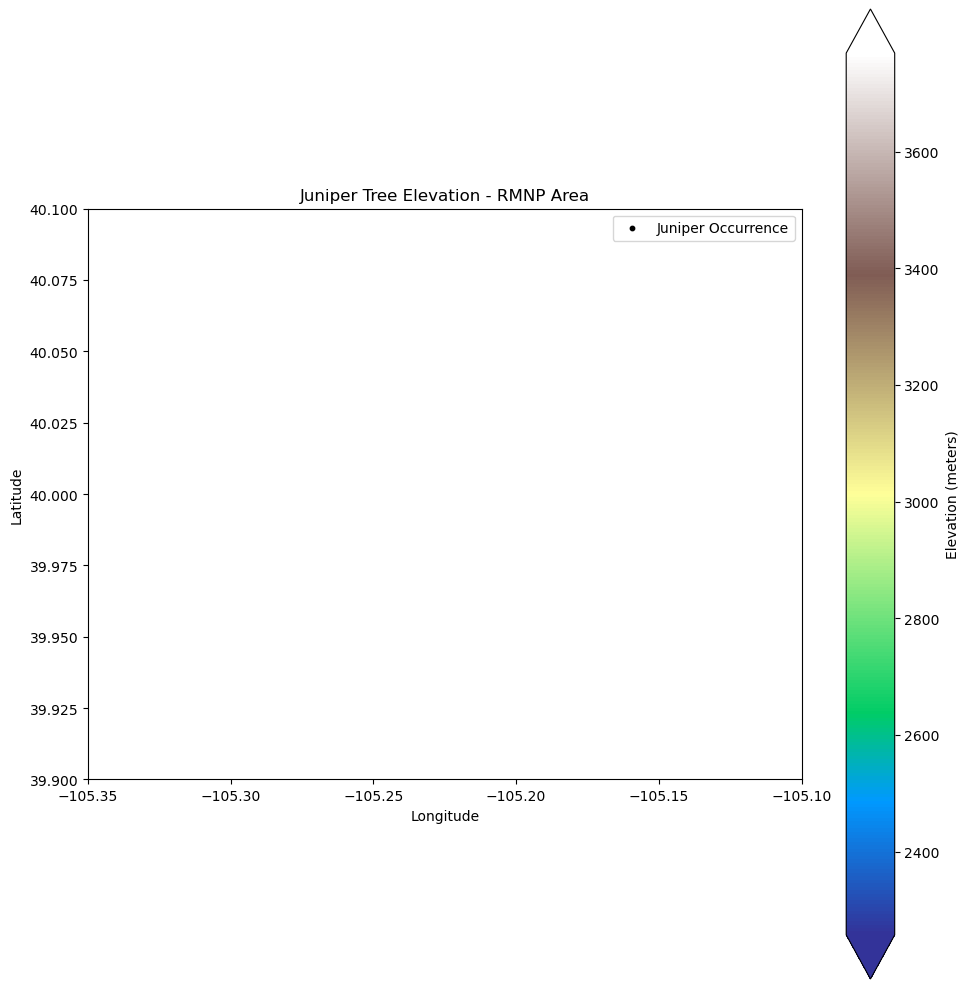

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# Plot raster
srtm_juniper_result_da.plot(
    ax=ax,
    cmap='terrain',
    robust=True,
    cbar_kwargs={"label": "Elevation (meters)"}
)

# Plot juniper occurrences
if gbif_gdf.geometry.iloc[0].geom_type == "Point":
    gbif_gdf.plot(ax=ax, color='black', markersize=10, label='Juniper Occurrence')
else:
    gbif_gdf.boundary.plot(ax=ax, color='black', linewidth=1, label='Juniper Boundary')

# Plot Boulder boundary
romo_gdf.boundary.plot(ax=ax, color='red', linewidth=2, label='Rocky Mountain National Park', aspect=1)

if romo_gdf.crs != "EPSG:4326":
    romo_gdf = romo_gdf.to_crs("EPSG:4326")

# Set valid aspect ratio
ax.set_aspect('equal')  # avoids math domain errors
ax.set_xlim(-105.35, -105.1)
ax.set_ylim(39.9, 40.1)

# Label the axes
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Add title, legend, and formatting
ax.set_title("Juniper Tree Elevation - RMNP Area")
ax.legend()

plt.tight_layout()
plt.show()


In [69]:
data_download = (pathlib.Path.home() / 'data-store' / 'data' / 'iplant'
                 / 'home' / 'elemilene01' / 'data_download_habitat_suitability')


# Step 1: Define paths
zip_path = (data_download/'Fire_Feature_Data_ArcMap10x.gdb.zip')
extract_dir = (data_download/"fire_data_gdb")

# Step 2: Unzip to a folder
extract_dir.mkdir(exist_ok=True, parents=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")

# Step 3: Locate the .gdb folder
files = os.listdir(extract_dir)
gdb_folder = [f for f in files if f.endswith('.gdb')][0]  
gdb_path = os.path.join(extract_dir, gdb_folder)

print("Found GDB folder:", gdb_path)

# Step 4: List layers in the geodatabase
layers = fiona.listlayers(gdb_path)
print("Layers available:", layers)


Extraction complete.
Found GDB folder: /home/jovyan/data-store/data/iplant/home/elemilene01/data_download_habitat_suitability/fire_data_gdb/Fire_Feature_Data_v10.gdb
Layers available: ['USGS_Wildland_Fire_Combined_Dataset', 'USGS_Wildland_Fires_Overlapping_Fire_Data', 'USGS_Wildland_Fire_Merged_Dataset']


In [71]:
!pip install geopandas contextily
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx  # for basemap

# Load fire GDB path (already unzipped earlier)
gdb_folder = [f for f in os.listdir(extract_dir) if f.endswith('.gdb')][0]
gdb_path = os.path.join(extract_dir, gdb_folder)

# Load fire data
fires_gdf = gpd.read_file(gdb_path, layer='USGS_Wildland_Fire_Combined_Dataset')

# Drop null geometries
fires_gdf = fires_gdf[fires_gdf.geometry.notnull()]
romo_gdf_reprojected = romo_gdf.to_crs(fires_gdf.crs) 

# Spatial join: keep only fires intersecting Boulder
romo_fires_gdf = gpd.sjoin(fires_gdf, romo_gdf_reprojected, predicate="intersects", how="inner")

/tmp/ipykernel_197/3170070213.py:9: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  romo_gdf_web.boundary.plot(ax=ax, color='black', linewidth=2, label="Rocky Mounatin National Park")
/tmp/ipykernel_197/3170070213.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


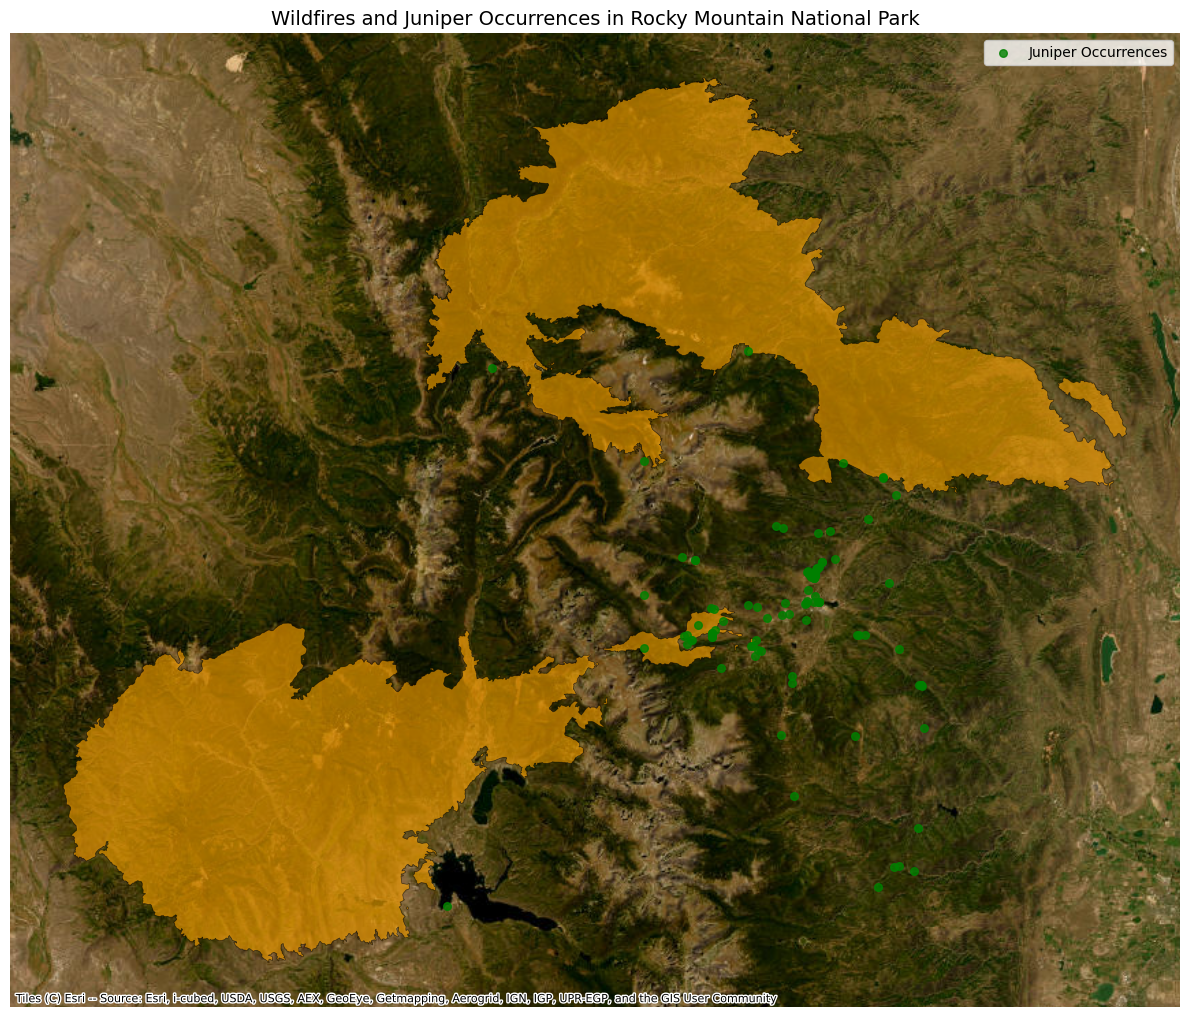

In [75]:
romo_fires_web = romo_fires_gdf.to_crs(epsg=3857)
romo_gdf_web = romo_gdf.to_crs(epsg=3857)
juniper_gdf_web = gbif_gdf.to_crs(epsg=3857)

# Plot all layers
fig, ax = plt.subplots(figsize=(12, 12))

# Plot Boulder boundary
romo_gdf_web.boundary.plot(ax=ax, color='black', linewidth=2, label="Rocky Mounatin National Park")

# Plot wildfires
romo_fires_web.plot(ax=ax, color='orange', alpha=0.6, edgecolor='k', linewidth=0.5, label="Fires")

# Plot juniper points
juniper_gdf_web.plot(ax=ax, color='green', markersize=30, alpha=0.8, label="Juniper Occurrences")

# Add ESRI satellite basemap
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery, crs=3857)

# Final touches
plt.title("Wildfires and Juniper Occurrences in Rocky Mountain National Park", fontsize=14)
plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()